# Linear Regression Algorithm

## Introduction to Linear Regression
Linear regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables. It is widely used for predictive analysis and can be used to understand the relationship between variables.

## Mathematical Formulation

### Hypothesis Function
In Linear Regression, we try to predict the output variable (dependent variable) using a linear relationship with the input variable (independent variable). The hypothesis function represents this relationship:

$$ h(x) = \theta_0 + \theta_1 x $$

where:
- \( h(x) \) is the predicted value.
- \( \theta_0 \) is the y-intercept of the line.
- \( \theta_1 \) is the slope of the line.
- \( x \) is the input feature.

### Cost Function (Mean Squared Error)
To measure how well our hypothesis function is performing, we use a cost function. The cost function used in Linear Regression is the Mean Squared Error (MSE), which calculates the average of the squared differences between the predicted values and the actual values:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2 $$

where:
- \( J(\theta) \) is the cost function.
- \( m \) is the number of training examples.
- \( h(x^{(i)}) \) is the predicted value for the i-th training example.
- \( y^{(i)}) \) is the actual value for the i-th training example.

### Gradient Descent
To minimize the cost function and find the optimal values for \( \theta_0 \) and \( \theta_1 \), we use an optimization algorithm called Gradient Descent. Gradient Descent updates the parameters iteratively by taking steps proportional to the negative of the gradient of the cost function:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

where:
- \( \theta_j \) is the parameter to be updated (either \( \theta_0 \) or \( \theta_1 \)).
- \( \alpha \) is the learning rate, a small positive value that controls the size of the steps.
- \( x_j^{(i)} \) is the input feature associated with the parameter \( \theta_j \).

By repeating this process, Gradient Descent converges to the optimal values of \( \theta \) that minimize the cost function.


## Implementation in Python


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

We are importing several libraries that will help us perform various tasks:

- numpy and pandas for data manipulation.
- matplotlib.pyplot for plotting graphs.
- train_test_split to split our data into training and testing sets.
- LinearRegression to create our linear regression model.
- mean_squared_error and r2_score to evaluate our model.
- load_boston to load a dataset we will use.

### Load the dataset


In [2]:
# Load the dataset
print("Loading the dataset...")
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

Loading the dataset...


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

We load the Boston Housing dataset, convert it into a Pandas DataFrame for easier manipulation, and add the target variable (house prices) to our DataFrame.

### Data preprocessing


In [3]:
# Data preprocessing
X = data.drop('PRICE', axis=1)
y = data['PRICE']

We separate our data into two parts: the input features (X) and the target variable (y). The input features are all the columns except the house prices.

### Splitting the dataset into training and testing sets

In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We split our data into two sets: one for training the model (80% of the data) and one for testing the model (20% of the data). The random_state=42 ensures the split is reproducible.

### Training the Linear Regression model

In [6]:
# Training the Linear Regression model
print("Training the Linear Regression model...")
model = LinearRegression()
model.fit(X_train, y_train)

Training the Linear Regression model...


LinearRegression()

We create an instance of the Linear Regression model and train it using the training data.

### Making predictions

In [7]:
# Making predictions
y_pred = model.predict(X_test)

We use the trained model to make predictions on the test data.

### Evaluating the model

In [8]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.291119474973442
R-squared: 0.668759493535633


We evaluate the model by calculating the Mean Squared Error (MSE) and the R-squared value (R²) to see how well the model is performing.

## Visualization
### Plotting the regression line

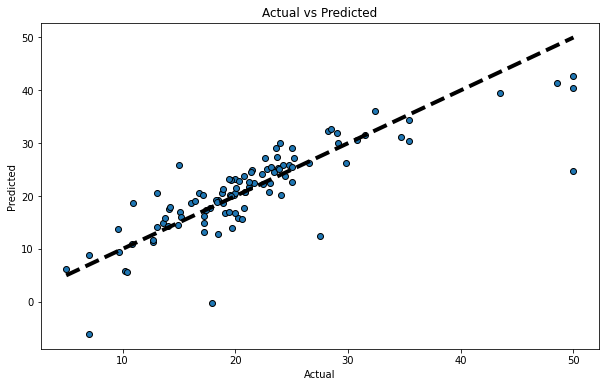

In [9]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

We plot the actual house prices against the predicted prices. The dashed line represents the ideal case where the predicted values are equal to the actual values.

### Plotting residuals

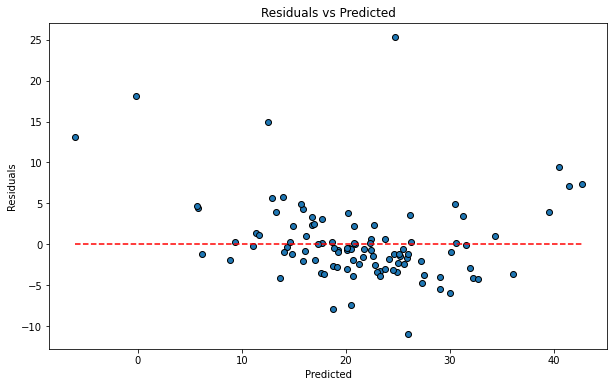

In [10]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

We plot the residuals (differences between the actual and predicted values) to check for any patterns. Ideally, residuals should be randomly scattered around zero.

## Conclusion
In this notebook, we have explained the Linear Regression algorithm, implemented it using the Boston Housing dataset, and evaluated its performance. Linear Regression is a powerful tool for predictive analysis and understanding relationships between variables.